Prediksi Penyakit Jantung menggunakan model Machine Learning - Decision Tree

1. Dataset yang digunakan https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

2. Model yang digunakan Decision Tree

Attribute Information:

1. age

2. sex

3. chest pain type (4 values)

4. resting blood pressure

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved

9. exercise induced angina

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment

12. number of major vessels (0-3) colored by flourosopy

13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
df = pd.read_csv('heart.csv')

Dalam dataset yang digunakan sudah dilakukan perubahan dari data kategorikal menjadi data kontinu, yang termasuk dalam data kategorikal yang sudah dirubah adalah ***sex, cp, fbs, restecg, exang, slope, ca, thal, dan target***.
sedangakn untuk data kontinua adalah ***age, trestbps, chol, thalach, dan oldpeak.***

In [ ]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
677,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
696,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
335,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
971,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
247,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0


In [ ]:
data_kontinu = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_kategorikal = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check Missing Value

In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

**Dataset tidak memiliki data yang kosong.**

## Data Visualisasi

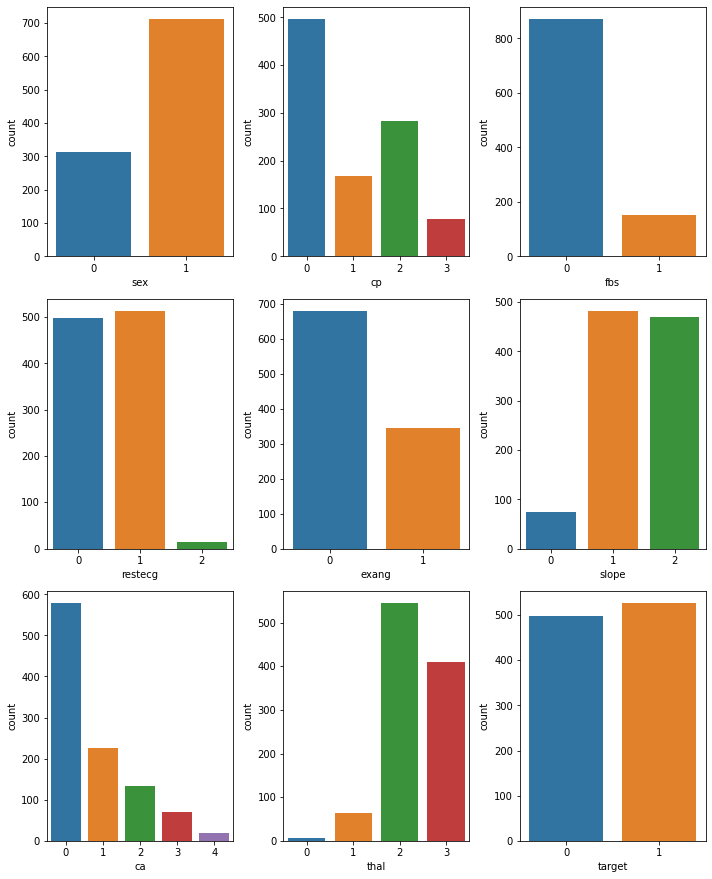

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0, len(data_kategorikal)):
  plt.subplot(5, 3, i+1)
  sns.countplot(df[data_kategorikal[i]])
  plt.tight_layout()

**Dari gambar diatas dapat dilihat bahwa data laki-laki lebih banyak dari perempuan dan dari target lebih banyak yang berpontesi heart attack.**

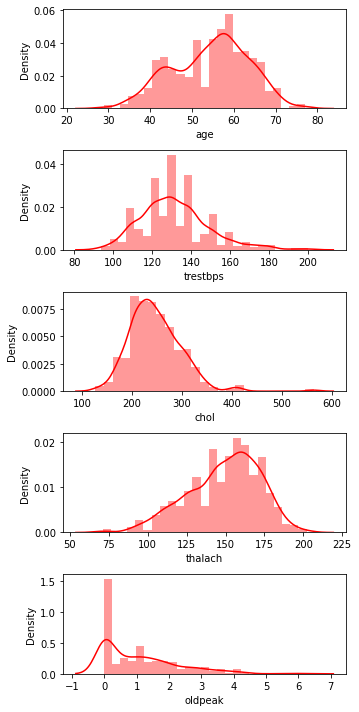

In [ ]:
plt.figure(figsize=(5,10))
for i in range(0, len(data_kontinu)):
  plt.subplot(5, 1, i+1)
  sns.distplot(df[data_kontinu[i]], color='r', bins=25)
  plt.tight_layout()

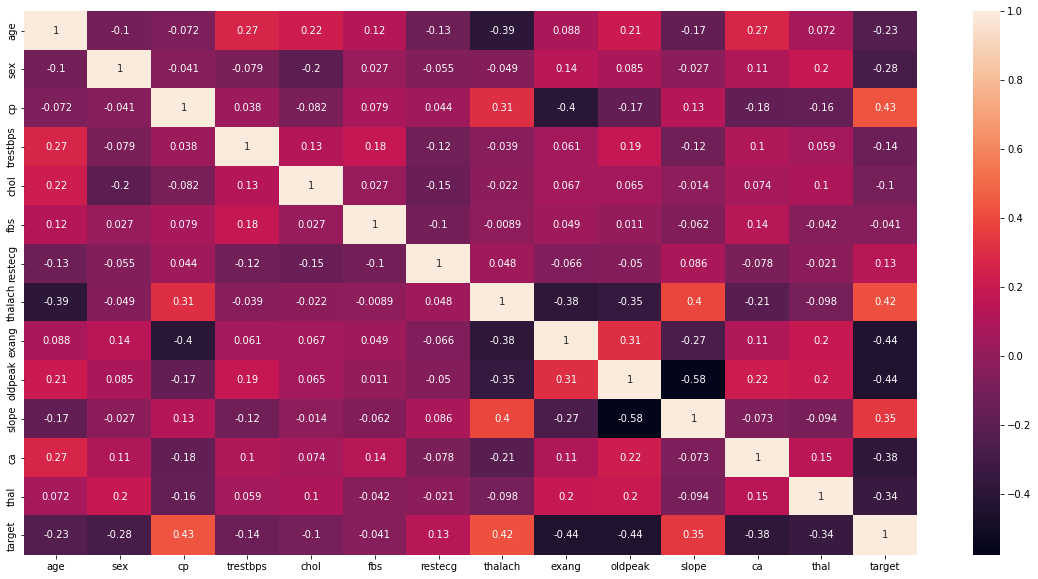

In [ ]:
korelasi = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(korelasi, annot=True)

Dari heatmap diatas dapat dilihat data yang paling berkolerasi dengan target adalah ***cp (0.43), thalach (0.42), slope (0.35), restecg (0.13), dan seterusnya.***

##Data Preprocessing

In [ ]:
mx = MinMaxScaler()

In [ ]:
df['age'] = mx.fit_transform(df[['age']])
df['trestbps'] = mx.fit_transform(df[['trestbps']])
df['chol'] = mx.fit_transform(df[['chol']])
df['thalach'] = mx.fit_transform(df[['thalach']])
df['oldpeak'] = mx.fit_transform(df[['oldpeak']])

In [ ]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
337,0.520833,1,2,0.292453,0.335616,0,0,0.618321,0,0.080645,0,1,2,1
870,0.395833,0,2,0.339623,0.340183,0,1,0.519084,0,0.032258,2,0,2,1
635,0.500000,0,0,0.339623,0.315068,0,0,0.549618,0,0.064516,1,0,2,1
518,0.416667,1,2,0.245283,0.141553,0,1,0.519084,0,0.322581,1,3,3,0
36,0.458333,1,3,0.292453,0.198630,0,0,0.412214,1,0.225806,2,1,2,1


## Modeling

### Split Data

In [ ]:
X=df.drop(columns=['target'])
y=df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1)

***Dataset dibagi dengan porsi pembagian Train = 75% dan Test 25%.***

### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_model_pred = dt_model.predict(X_test)

In [ ]:
#Menghitung Accuracy, Precision, dan Recall

print('Accuracy:', metrics.accuracy_score(y_test, dt_model_pred))
print('Precision:', metrics.precision_score(y_test, dt_model_pred))
print('Recall:', metrics.recall_score(y_test, dt_model_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
